# Estación Villaverde

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [5]:
df = pd.read_csv("../data/df_17.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [6]:
df.head()

,NO2
month,
2013-01-01,49.774194
2013-02-01,37.741935
2013-03-01,27.387097
2013-04-01,26.354839
2013-05-01,26.258065


### Estacionalidad

In [7]:
df2 = df.copy()

In [8]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

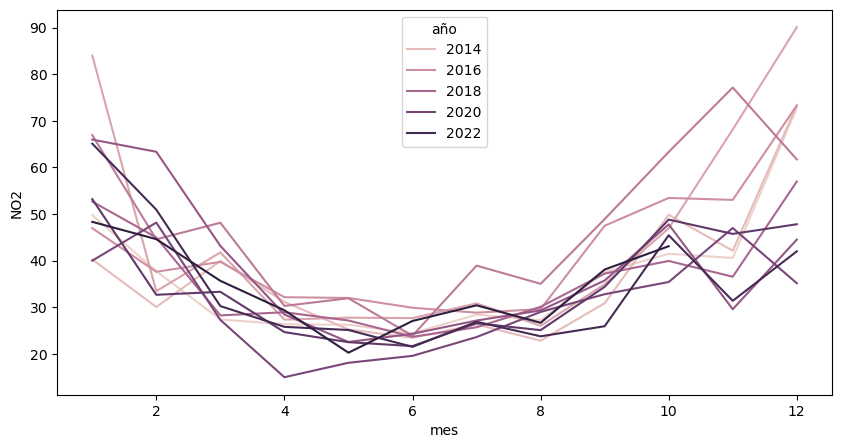

In [9]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

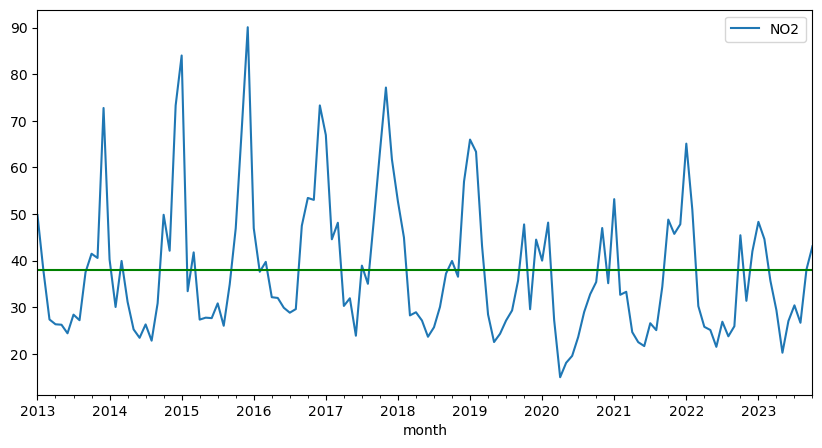

In [10]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

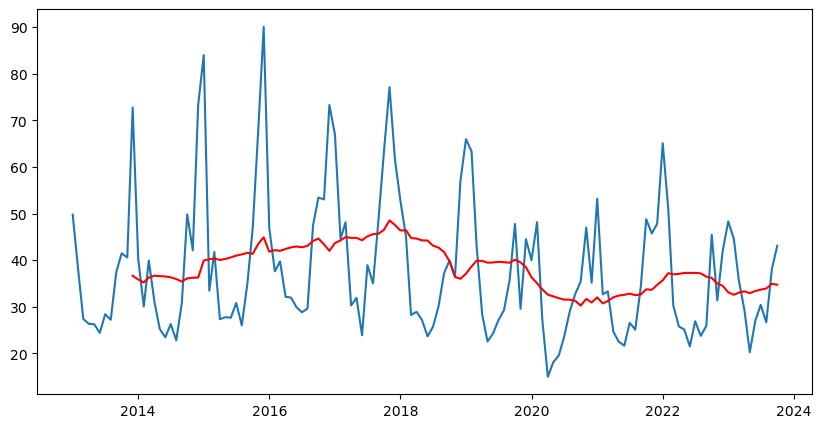

In [11]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

### Test de Fuller

In [12]:
res = adfuller(df["NO2"])
res

(-1.3519339758746105,
 0.6050905698813402,
 11,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 861.3198312977037)

In [13]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -1.3519339758746105
p-value 0.6050905698813402
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [14]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 0.9999999999999999
1 mes Lag, 0.632623774409478
2 mes Lag, 0.3373118959823938
3 mes Lag, 0.06637128500828599
4 mes Lag, -0.2469919332846918
5 mes Lag, -0.42490194721600927
6 mes Lag, -0.4725331707418171
7 mes Lag, -0.439442228515973
8 mes Lag, -0.26242651871855704
9 mes Lag, 0.04039977171107308
10 mes Lag, 0.31597905304924245
11 mes Lag, 0.5648023872895699
12 mes Lag, 0.6974604440623817
13 mes Lag, 0.5886660294768884
14 mes Lag, 0.3245165950795738
15 mes Lag, 0.0620099204785502
16 mes Lag, -0.24771642266171937
17 mes Lag, -0.4184127368512149
18 mes Lag, -0.5183211491985428
19 mes Lag, -0.4689185104318222
20 mes Lag, -0.27625593118424374
21 mes Lag, -0.001763449247954382
22 mes Lag, 0.22706555739909806
23 mes Lag, 0.565282518086924
24 mes Lag, 0.7005568246200587
25 mes Lag, 0.5085696102610259
26 mes Lag, 0.2868839065433999
27 mes Lag, 0.00572288543635188
28 mes Lag, -0.3025699521358045
29 mes Lag, -0.4879956397300937
30 mes Lag, -0.5728455416042
31 mes Lag, -0.498346813045372

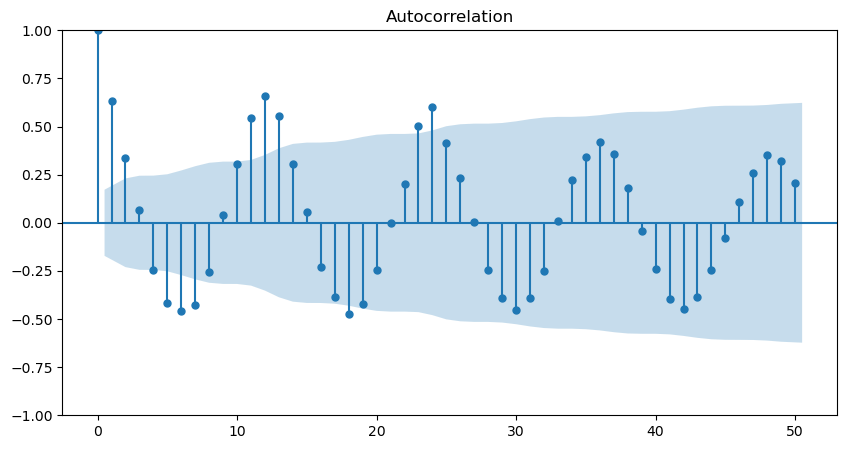

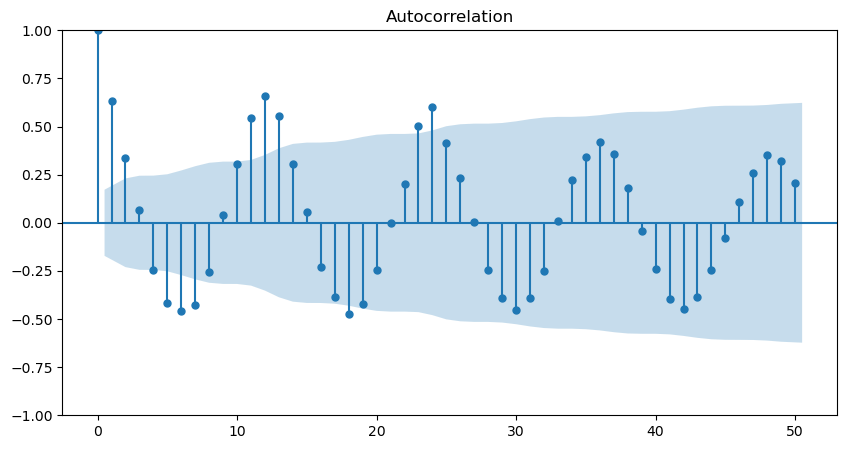

In [15]:
plot_acf(df, lags = 50)

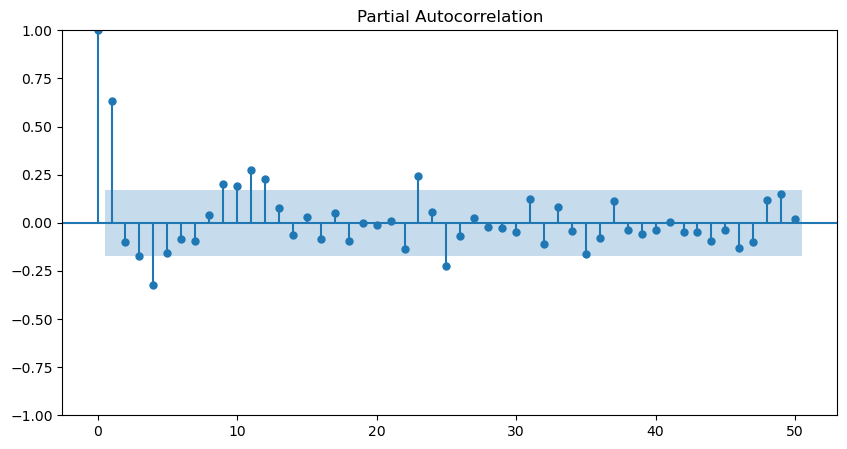

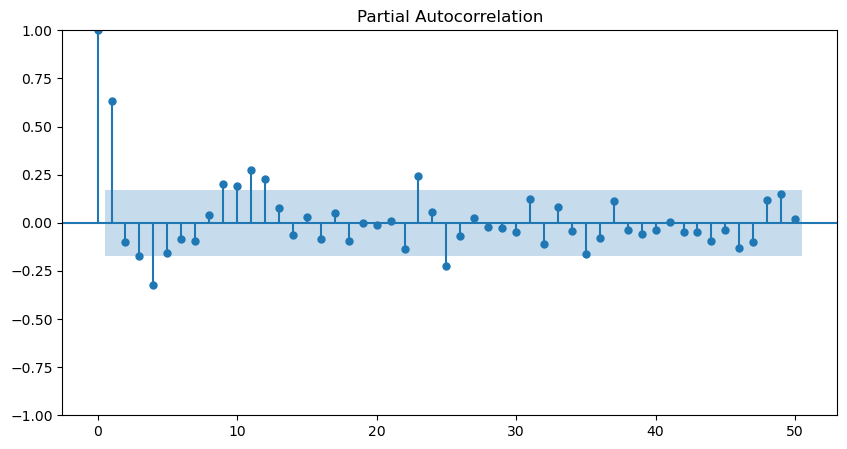

In [16]:
plot_pacf(df, lags = 50)

In [17]:
df.head()

,NO2
month,
2013-01-01,49.774194
2013-02-01,37.741935
2013-03-01,27.387097
2013-04-01,26.354839
2013-05-01,26.258065


In [18]:
df.shape

(130, 1)

In [19]:
df.isnull().sum()

NO2    0
dtype: int64

In [20]:
df.dtypes

NO2    float64
dtype: object

## SARIMA

In [21]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [22]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [23]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(6, 1, 3, 12) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error mae:  6.015012149577846
CPU times: total: 547 ms
Wall time: 20 s


,real,pred,error
2021-05-01,22.516129,22.030638,-0.485491
2021-06-01,21.677419,23.042304,1.364885
2021-07-01,26.580645,25.311242,-1.269403
2021-08-01,25.096774,24.655988,-0.440787
2021-09-01,34.387097,29.613673,-4.773423
2021-10-01,48.806452,40.735845,-8.070607
2021-11-01,45.741935,29.716118,-16.025817
2021-12-01,47.806452,65.368843,17.562391
2022-01-01,65.096774,49.301743,-15.795031
2022-02-01,50.935484,38.980149,-11.955335


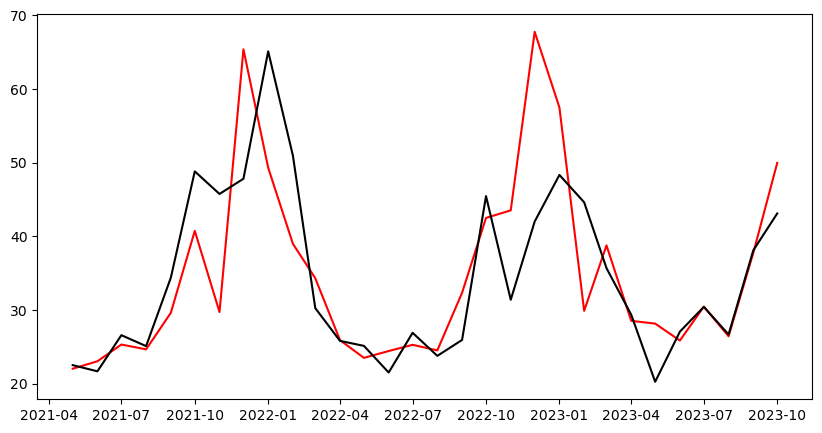

In [24]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [25]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 12))
pred_año

,predicted_mean
2023-11-01,57.732351
2023-12-01,80.965118
2024-01-01,57.517948
2024-02-01,32.743985
2024-03-01,39.765477
2024-04-01,32.352980
2024-05-01,30.871559
2024-06-01,27.140922
2024-07-01,30.668375
2024-08-01,27.650055


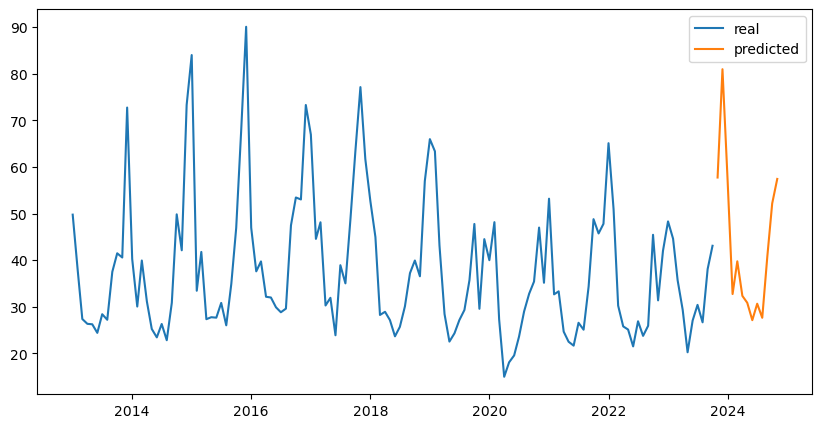

In [26]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [27]:
pred_año.mean()

predicted_mean    43.674448
dtype: float64